# Vector Calculus

Classical electrodynamics describes electromagnetic fields that vary in time and space.  To describe these variations, we use the mathematical framework of ***vector calculus***.  This means that we take derivatives and integrals of scalar and vector fields in three dimensions.  This notebook will introduce you to the most important operations of vector calculus in electrodynamics and give you some tools for visualizing the effect of these operations.

## Modules

A **module** is a collection of Python functions defined in a separate file.  This notebook uses a couple of custom modules: `Electrodynamics.py` and `VectorCalculus.py`.

Before we import them, find these files in your directory, open them, and inspect their contents.

- What are some of the functions defined in these modules?  What do they do?

***Replace with your response.***

In [1]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Get access to custom functions.
import VectorCalculus as vc
import Electrodynamics as ed

from importlib import reload
reload(vc)
reload(ed)

<module 'Electrodynamics' from 'C:\\Users\\jaime\\OneDrive\\Documents\\Electricty and Magnetism HW\\electrodynamics\\week-02\\Electrodynamics.py'>

In [2]:
## Use this command to turn ON interactive plots:
# %matplotlib notebook

## Use this command to turn OFF interactive plots.
# %matplotlib inline

Now that we have access to the functions, let's create an electric field, an electrostatic potential, and start exploring.

In [3]:
# Define coordinate grid.
num_points = 257
box_size = 5

# Store coordinate arrays.
X,Y,Z = ed.coordinates(L=box_size, N=num_points)

# Compute grid spacing.
ds = X[1,0,0] - X[0,0,0]

# Store grid and spacing in a single object for repeated use later.
grid = (X,Y,Z,ds)

# Define charge and location of two point charges.
Q1 = +1
x1 = -1
y1 = 0
z1 = 0
R1 = np.array([x1,y1,z1])

Q2 = -1
x2 = +1
y2 = 0
z2 = 0
R2 = np.array([x2,y2,z2])

# Compute the potential.
V  = ed.point_charge_potential(Q1, R1, X, Y, Z)
V += ed.point_charge_potential(Q2, R2, X, Y, Z)

# Compute the electric field.
E  = ed.point_charge_field(Q1, R1, X, Y, Z)
E += ed.point_charge_field(Q2, R2, X, Y, Z)

<Axes3DSubplot:>

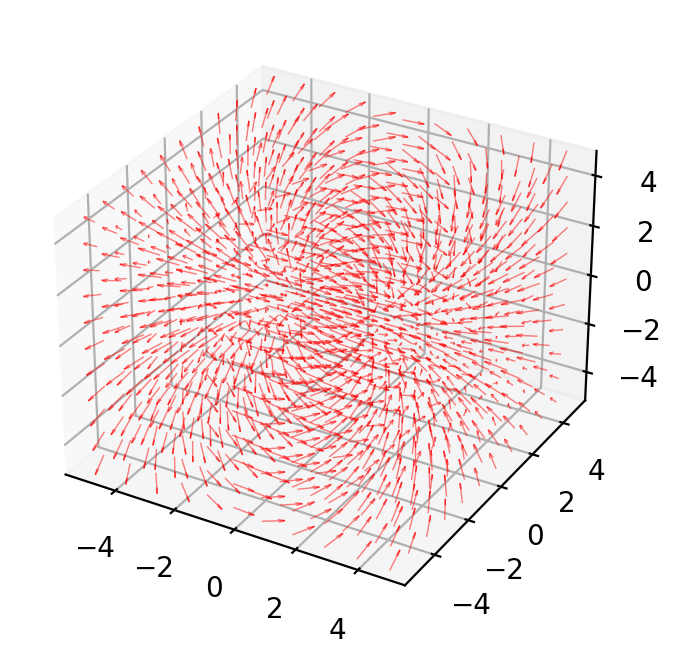

In [4]:
# Draw the electric field.
ed.draw_vector_field(X,Y,Z,*E)

<AxesSubplot:>

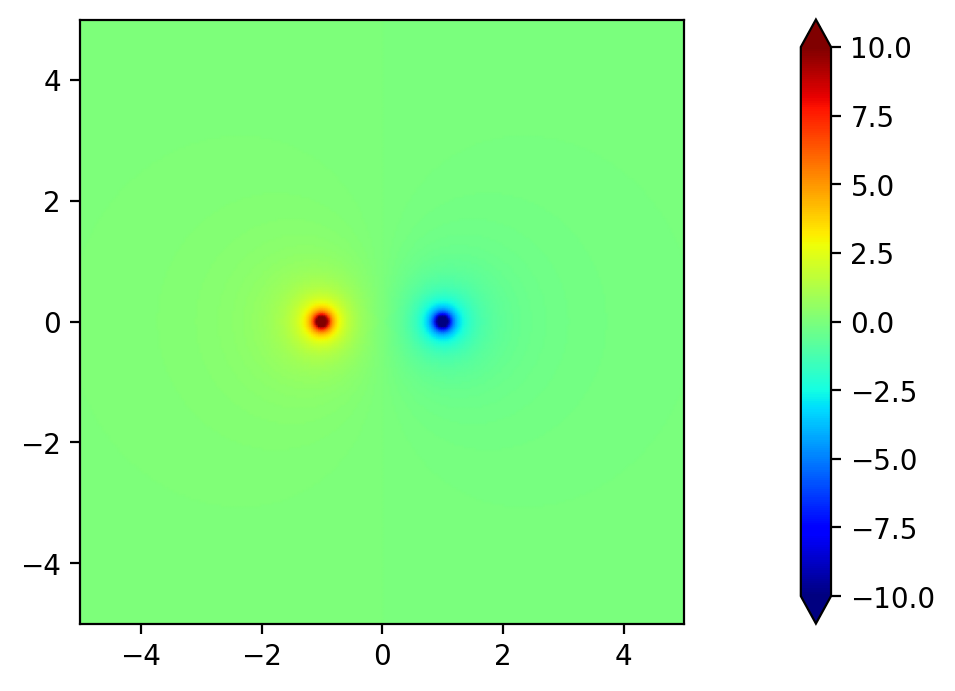

In [5]:
# Draw a slice through the potential.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,V,z0, cutoff=10)

## Integrals

When you first learned what an integral was, you probably learned about a one dimensional integral of a function of just one variable: $\int dx \, f(x)$.  In electrodynamics, we have three dimensions, so all of our functions have three variables: $V(x,y,z)$, $\vec{E}(x,y,z)$.  What's more, some of the fields we work with are vector fields, so they have three components.  We can integrate these fields over lines, surfaces, or volumes.

Let's look at some of the useful integrals we can create.

## Line Integral

A familiar operation from vector calculus is the line integral.  We use it in classical mechanics to calculate the work required to move a system from point A to point B:

$$W = \int_{A}^{B} d\vec{s} \cdot \vec{F}$$

We can generalize the idea of the line integral to any vector field.  Let's explore this concept for the electric field of two charges.

The contour integral is 0.036314188005131504


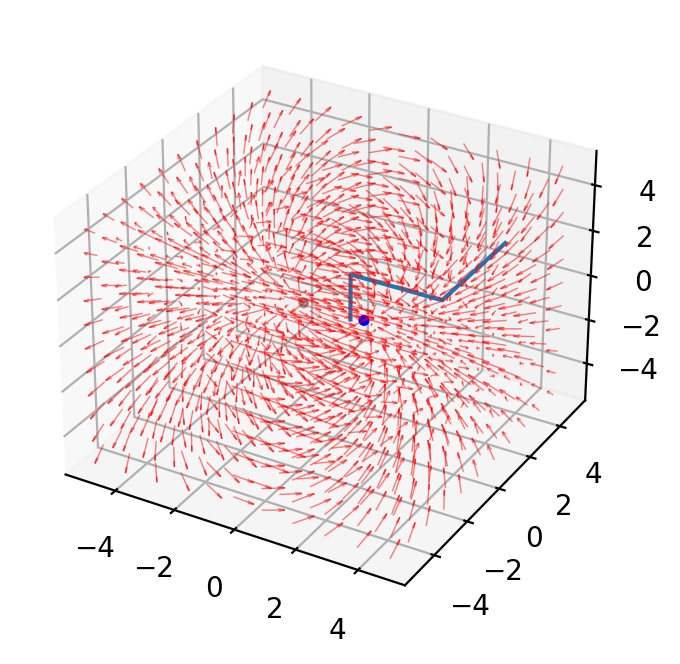

In [13]:
# Define a path.
x0 = 0
y0 = 1
z0 = -1

# Initial position.
P0 = np.array([x0,y0,z0])

# Use unit vectors to define the displacement.
dx = 3 * vc.eX
dy = 4 * vc.eY
dz = 2 * vc.eZ

# Move to endpoint in steps along a single axis.
P1 = P0 + dz
P2 = P1 + dx
P3 = P2 + dy

# Assemble the points into a list.
points = [P0, P1, P2, P3]

# Compute the contour integral.
W = vc.path_integral(E, points, *grid)

# Draw the electric field and the path.
ax = vc.draw_path(E, points, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The contour integral is", W)

By changing the order of the steps (dx, dy, dz) you can generate six different paths between the starting and ending point.  Do this.  What range of values do you observe for the different paths?

Not a huge difference in contour of path (work along the path?). The most significant seemed to be that if the first step was the same, the paths were mroe similar (although z0 broke this rule, and I'm not sure why).


Contour (dx, dy, dz) = 0.0364
Contour (dx, dz, dy) = 0.0384
Contour (dy, dx, dz) = 0.0286
Contour (dy, dz, dx) = 0.0285
Contour (dz, dx, dy) = 0.0363
Contour (dz, dy, dx) = 0.0285

Create a path with at least 6 points.  Plot it here.

I was able to add the points into the code everywhere except after I put them into the list (P0, P1, P2, P3, P4, P5, P6), it can no longer calculate the integral, so I left it plotted with three points, showing where I added the 3 new ones to the code, they just aren't appearing in the plot.

The contour integral is 0.036314188005131504


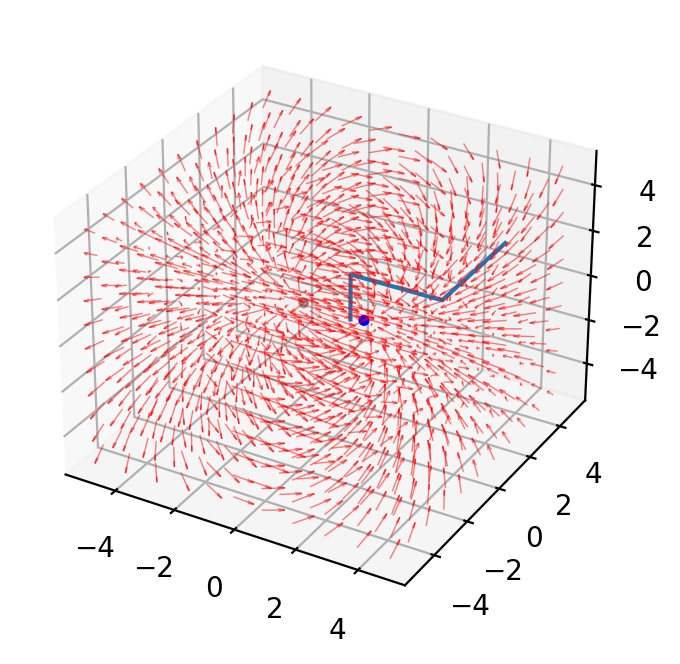

In [124]:
# Define a path.
x0 = 0
y0 = 1
z0 = -1
a0 = 2
b0 = 3
c0 = -3

# Initial position.
P0 = np.array([x0,y0,z0])

# Use unit vectors to define the displacement.
dx = 3 * vc.eX
dy = 4 * vc.eY
dz = 2 * vc.eZ
da = 3 * vc.eX
db = 4 * vc.eY
dc = 2 * vc.eZ

# Move to endpoint in steps along a single axis.
P1 = P0 + dz
P2 = P1 + dx
P3 = P2 + dy
P4 = P3 + da
P5 = P4 + db
P6 = P5 + dc


# Assemble the points into a list.
points = [P0, P1, P2, P3]

# Compute the contour integral.
W = vc.path_integral(E, points, *grid)

# Draw the electric field and the path.
ax = vc.draw_path(E, points, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The contour integral is", W)

## Circulation

If the contour for a line integral starts and ends on the same point, its value is called the **circulation** of the vector field, sometimes given the symbol $\Gamma$:

$$\Gamma = \oint d\vec{s} \cdot \vec{E}$$

The "O" on the integral sign is to indicate that the path is actually a closed loop.

The circulation integral is 0.0015785810219010044


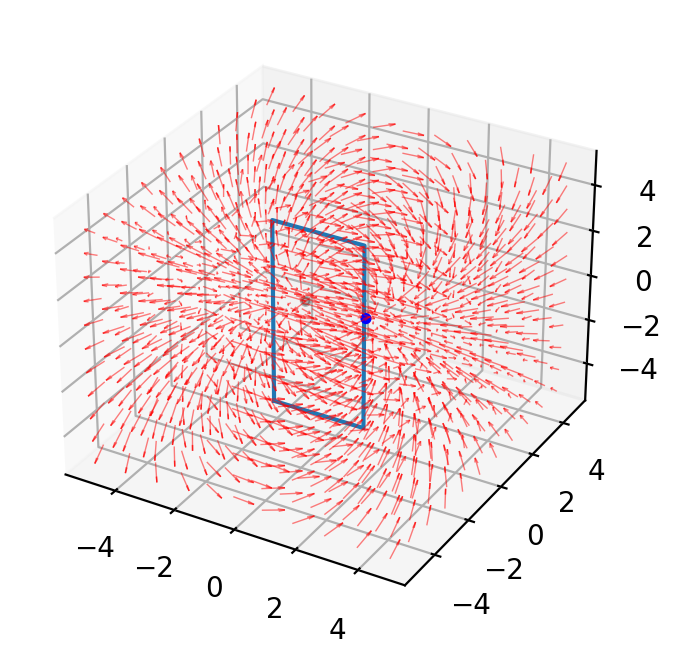

In [75]:
# Define a path.
x0 = -1.5
y0 = -1
z0 = -4

# Initial position.
P0 = np.array([x0,y0,z0])

# Use unit vectors to define the displacement.
dx = 3 * vc.eX
dy = 4 * vc.eY
dz = 8 * vc.eZ

# Move to endpoint in steps along a single axis.
P1 = P0 + dx
P2 = P1 + dz
P3 = P2 - dx
P4 = P3 - dz

# Assemble the points into a list.
points = [P0, P1, P2, P3, P4]

# Compute the circulation.
Gamma = vc.path_integral(E, points, *grid)

# Draw the electric field and the path.
ax = vc.draw_path(E, points, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The circulation integral is", Gamma)

Move the loop around and change its size and orientation by modifying the code above.  You can try adding more points if you would like.

Compute the circulation for at least 6 different contours.  What range of values do you observe?

Original: (-1.5, -1, -4) Circulation = 0.002

Change 1: (-5, -1, -4): Shift left, circulation = -0.000

Change 2: (-5, 1, -4): Shift back, circulation = -0.000 

Change 3: (-5, -1, 4): The bottom line moves up, making the loop smaller, but the max height doesn't change. It does seem to be above the E lines. Circulation = 5.700 * 10^-5

However, if z becomes -8 (Change 4), the bottom stays still, and the top comes down to make the loop smaller. Circulation = -0.005

If x>2 (Change 5: (3, 8, -8)) the loop leaves the field lines altogether. Circulation = -5.713 * 10^-5

The loop also seems to get smaller if X>3 (4, 8, -8); circulation = -1.839 * 10^-5

At (3, 8, 4) circulation = 2.159 * 10^-5

Z seems to be the only variable that can change the shape of the loop. X-values seem to have less range than both y and z, which can go to at least 8, and x cannot. Circulation values seem to be the highest when the variables are similar in distance from the origin.

## Flux

A **flux** is often defined as an amount of *something* passing through a surface per unit time: energy, charge, mass, volume of fluid, etc.  However, the mathematical concept is more general.  We can compute the flux of *any* vector field through *any* surface.  The resulting quantity is often given the symbol $\Phi$.

$$\Phi = \int d\vec{A} \cdot \vec{E}$$

$d\vec{A}$ is an **area element** whose direction is perpendicular to the surface.  When the surface is closed, we indicate this with a modified integral sign.

$$\Phi = \oint d\vec{A} \cdot \vec{E}$$

Gauss' law is an example of flux through a closed surface.

The flux through the box is 0.0


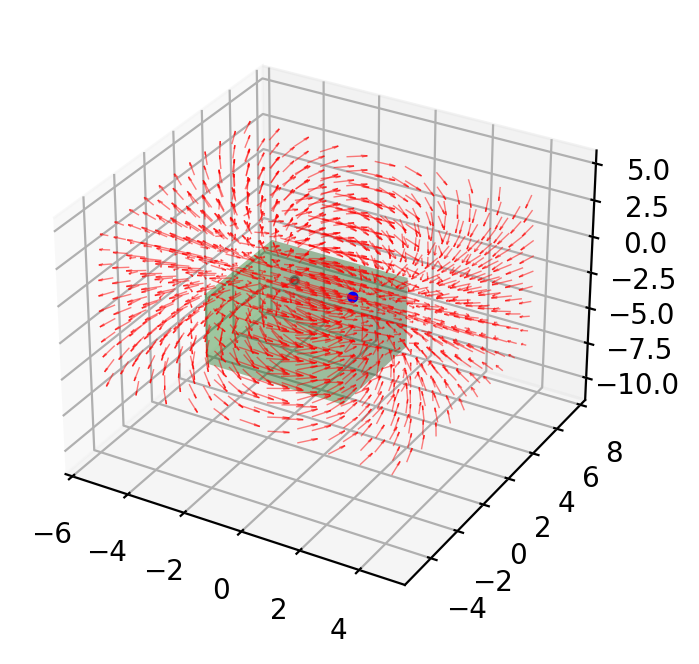

In [114]:
# Define rectangular box for computing flux.
# Coordinates of center.
xC = -3
yC = 5
zC = -8

# Lenth of sides.
dX = 5
dY = 5
dZ = 5

# Bottom, front, left corner, required by flux and plotting functions.
P0 = np.array([xC, yC, zC]) - np.array([dX,dY,dZ]) / 2

# Compute the flux.
Phi = vc.flux(E, P0, dX, dY, dZ, *grid)

# Draw the box and the field.
ax = vc.draw_box(E, P0, dX, dY, dZ, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The flux through the box is", Phi)

Explore the flux of this electric field.  Move the box around and change its shape by modifying the code above.

What range of values do you observe when ***no charges are in the box***?

As size increases, flux increases, however, fluz is more affected by symmetry then by size. When dx = 5 dy = 5 and dz = 7, flux is smaller than when dx = 5 dy = 5 and dz = 5. Also, visually determining whether the charge is centered is like lining the claw up over the prize in a claw machine, but I can tell that how centered the charges are affects the flux as well. 

Original (1, -4, -2) (no charge in box): Flux -0.0001
(-1, -4, -2) Lines up with x axis of charges; Flux = -0.0007
(-1, -2, -2) charges appear inside box; Flux = -0.0008
(-1, -2, 4) Box moxes up; Flux = -0.0003
(-8, 2, -4) Box is outside field; flux is completely zero.
Increasing dx (5): flux = -0.002
Increasing dy (5): flux = -0.018
Increasing dz (7): flux = 0.0358

Making box symmetrical: flux = 0.068

What range of values do you observe when ***only one charge is in the box***?

When only one is enclosed (-0.5, 3, -3) Flux =  -0.0066
(-0.5, 7, -2) Flux = -0.0002
(-0.5, 7, -6) Flux = -5.7841 * 10^-5

What range of values do you observe when ***both charges are in the box***?

When both charges are enclosed (-3, 3, -2) Flux = 0.1082 (which is also greater than when a larger, non-symmetrical box is at the same coordinates). However, at one point when both charges appear to be ebclosed, flux is absolutely zero.

So, it seems that flux is way greater when both charges are enclosed, but there is a point where the enclosed charges will not cause a flux on the box, which I guess is because the box surface at that point is nto perpendiculra to any field lines.

## Derivatives

When you first learned about derivatives, as with integrals, you probably learned about the rate of change of a scalar function of a single variable: $\dfrac{df}{dx}$.

In mechanics, we also use derivatives of vector funcations: $\vec{v}(t) = \dfrac{d\vec{r}}{dt}$.

There are more possibilities for derivatives in three dimensions, especially when working with vector fields.  We will see three kinds of derivatives quite often in this course.

## Gradient

You may already be familiar with the gradient from an earlier physics course.  We can't simply "take the deriviative of a function" in three dimensions.  We need to specify a direction first.  The gradient is special, because it gives the direction of **steepest ascent** — the direction in which a function changes most rapidly at a particular point in space.  (If the function happens to give the height as a function of position, then the gradient points directly uphill.)

The gradient of a scalar function is defined as a collection of derivatives:
$$
\mathbf{grad}(f) = \nabla f = \dfrac{\partial f}{\partial x} \, \mathbf{e}_x
        + \dfrac{\partial f}{\partial y} \, \mathbf{e}_y
        + \dfrac{\partial f}{\partial z} \, \mathbf{e}_z
$$

In [129]:
# Define a function in 3D.
f = np.exp(-X**8 - Y**4 - Z**2)

# Compute its gradient.
df = vc.grad(f,ds)

<Axes3DSubplot:>

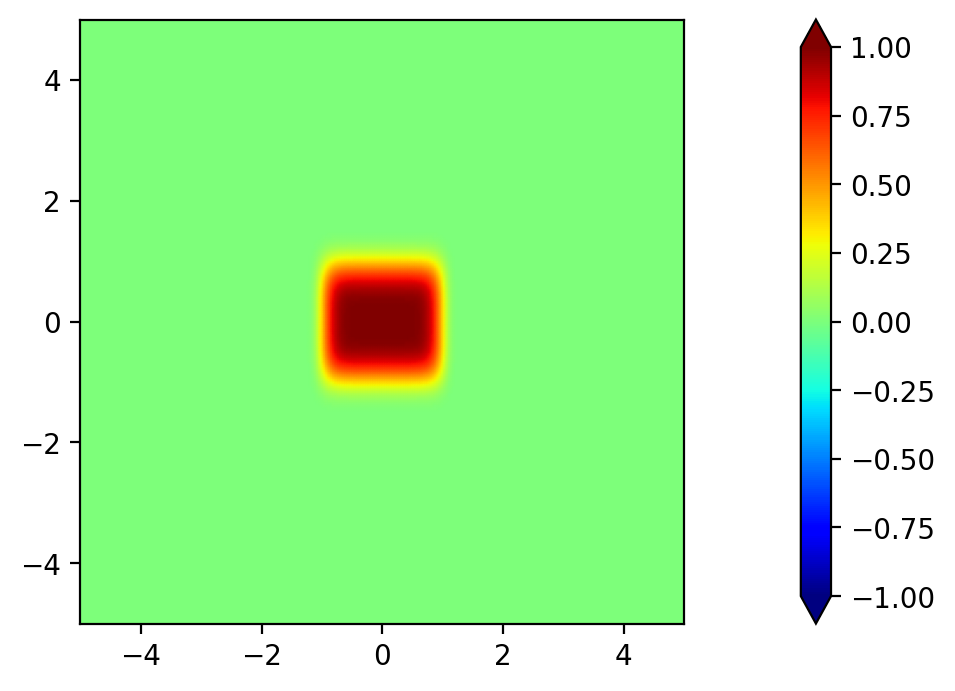

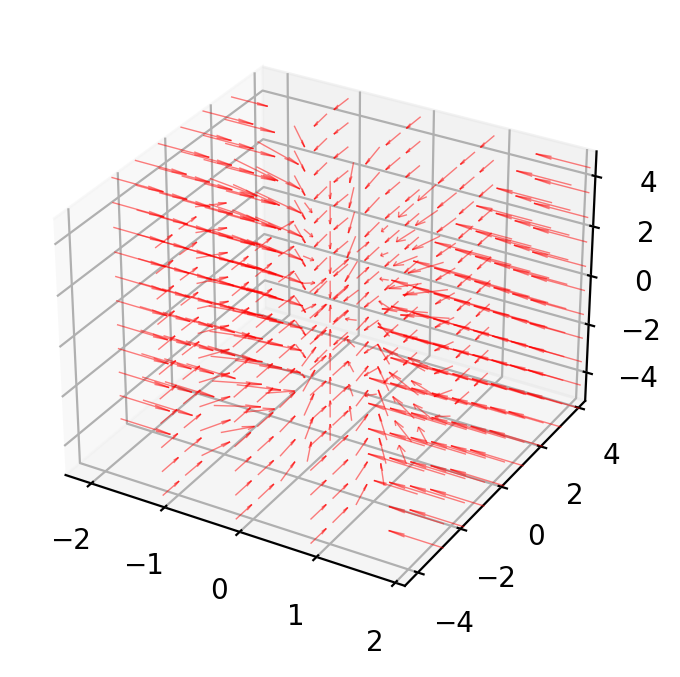

In [130]:
# Draw a slice of the function.
ed.draw_scalar_field(X,Y,Z,f, cutoff=f.max())

# Draw the resulting vector field.
ed.draw_vector_field(X,Y,Z,*df)

Compare the vector field to the scalar field.  Do the arrows make sense as a direction of steepest ascent?  Explain why or why not.

Yes. The first slice shows the function increasing most rapidly toward the center, so the vector field would also point towards the center, representing the direction when the function changes most rapidly.

Change the definition of $f(x,y,z)$ to plot some other functions of your choosing.  Maybe try for something with ripples ...

What are your observations about the relation of the gradient to the starting function?

Whether the starting function has x,y,z all multiplied by the same factor determines how straightforward the gradient is. When the Y and Z are bigger than X, the vecotrs don't point toward one point, but toward a central horizontal line.
When the Y and X are bigger than Z, the vectors point toward a central vertical line, and the slice shows a square!

**Note:** Notice that the gradient maps a scalar field to a vector field.  It is possible to take the gradient of a vector field, but the resulting object is called a ***tensor***.  In three dimensions, it has 9 components and can be interpreted as a kind of ***matrix-valued function*** at every point in space.  These are difficult to plot!

When we take the derivative of a vector field $\vec{F}(x,y,z)$, there are 9 possible derivatives:
$$
\dfrac{\partial F_x}{\partial x},
\dfrac{\partial F_x}{\partial y},
\dfrac{\partial F_x}{\partial z},
\dfrac{\partial F_y}{\partial x},
\dfrac{\partial F_y}{\partial y},
\dfrac{\partial F_y}{\partial z},
\dfrac{\partial F_z}{\partial x},
\dfrac{\partial F_z}{\partial y},
\dfrac{\partial F_z}{\partial z},
$$

It turns out that two combinations of these derivatives are all that is required for electrodynamics!  One combination, called the **divergence** produces a scalar field.  The other, called the **curl** produces another vector field.

## Divergence

The divergence of a vector field $\vec{F}(x,y,z)$ is defined as
$$\mathbf{div}(\vec{F}) = \nabla \cdot \vec{F} = 
\dfrac{\partial F_x}{\partial x} + 
\dfrac{\partial F_y}{\partial y} +
\dfrac{\partial F_z}{\partial z}
$$

In [145]:
# Define a vector field.
Fx = X**2 * Z
Fy = X*Y**2
Fz = X*2
F = np.stack([Fx, Fy, Fz])

# Compute the divergence.
dF = vc.div(F,ds)

<AxesSubplot:>

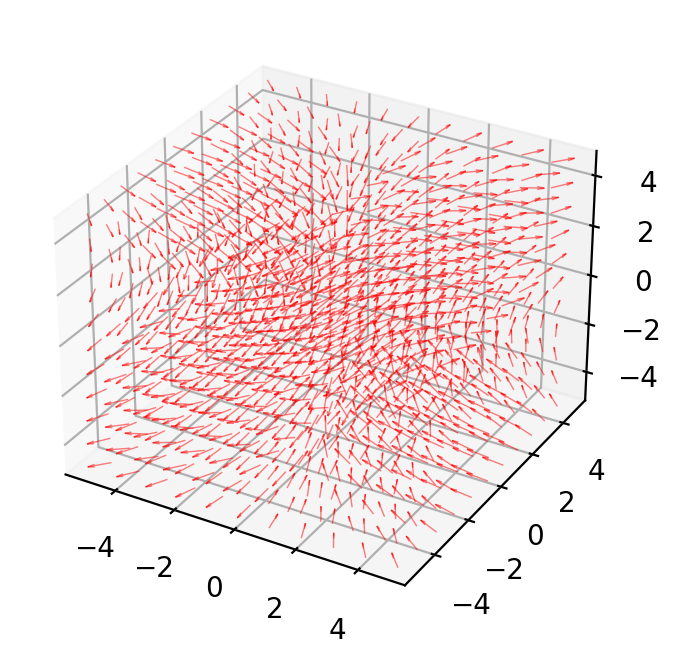

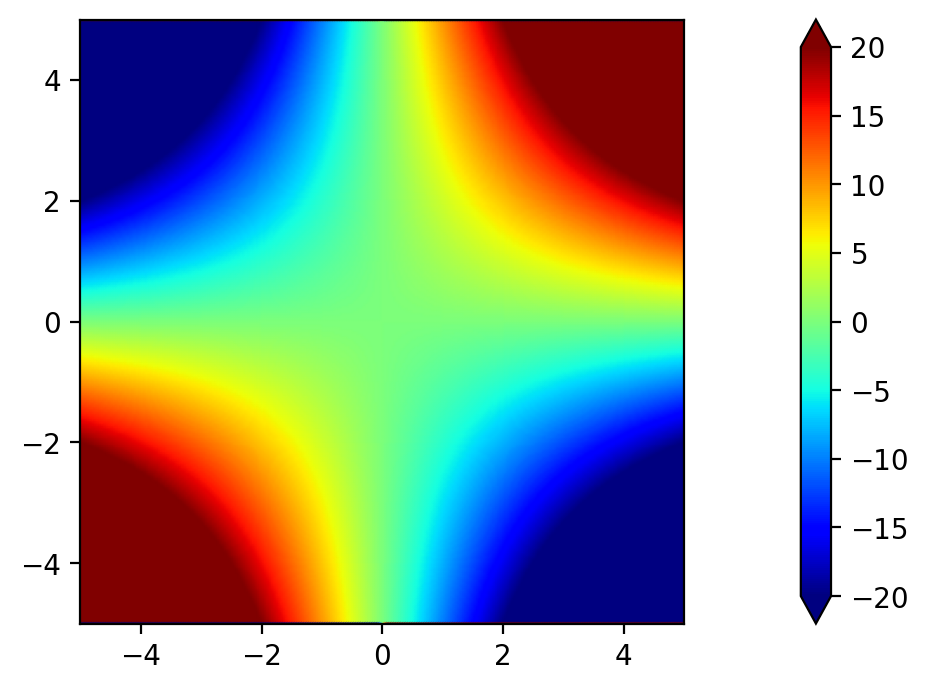

In [146]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot the divergence.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,dF,z0)

Compare the vector field to the scalar field.  Can you identify any correlations between the scalar field and the vector field?

The scalar field is way easier to recognize. It's hard to tell, but it almost looks like there are different planes in the vector field where the vectors are most concentrated, and I think I see a symmetry along a similar line to that of the divergence.

Try looking at different slices of the divergence.  Try changing the definition of the vector field.  Describe your efforts and observations.

When z0 increases, we see a slice of the divergence at a higher point. When z0 = 4, we see only a vertical colored shape where the blueand red come together, but when z0 = 5, we see a horizontal portion instead (probably the left side of the original slice. I can't write them all, but lots of cool things happen when z0 is changed to show different slices.

When Fx = X**2 * Z (Z replaces Y) the vector field becomes slightly more defined
When Fy = X*Y**2 (Z multiplier is gone) the vectors eventually all point outward.
When Fz = X*2 (y*2 is gone) the vectors are aobut as messy.

I honestly can't interpret the vector plots, but redefining the vector fields adds and takes away how "organized" they seem to be.

According to Maxwell's equations, the divergence of the electric field is related to the charge density ...

In [147]:
# Compute the divergence of the electric field.
dE = vc.div(E,ds)

<AxesSubplot:>

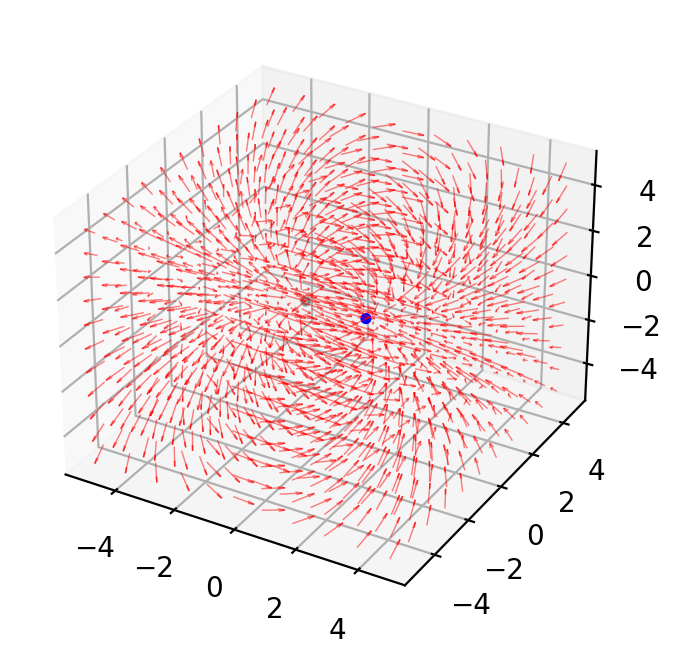

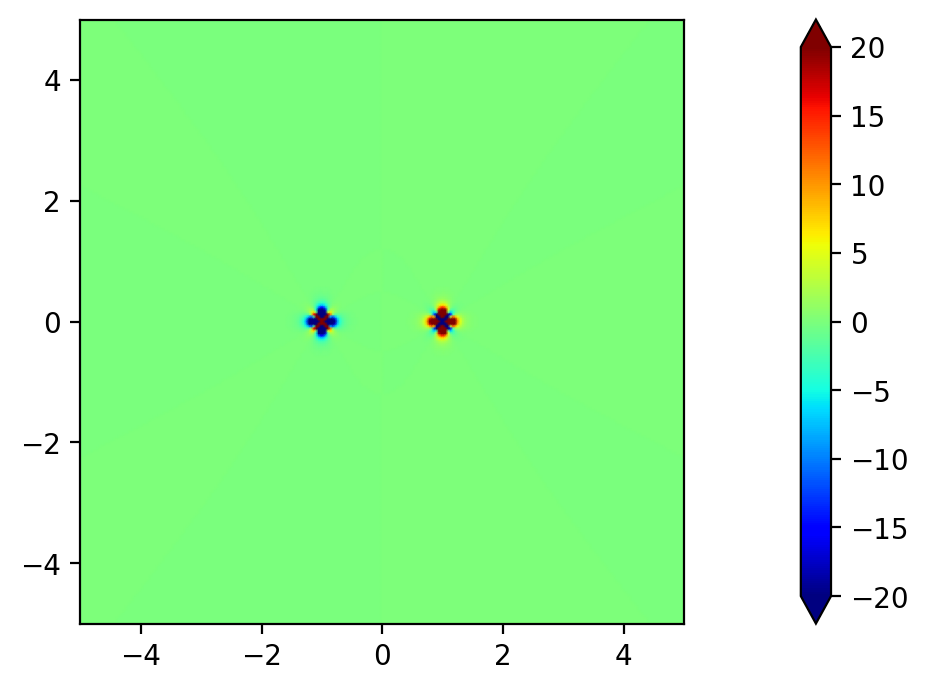

In [150]:
# Plot the vector field ...
ax = ed.draw_vector_field(X,Y,Z,*E)

# ... with charges.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Plot the divergence.
ed.draw_scalar_field(X,Y,Z,dE)

What kind of correlation do you see between the electric field and its divergence?

Divergence comes from two main points, because those two point charges define E!

Change the charges and their locations, and then recompute the field and its divergence.  Describe your efforts and the results.

I found R1 and R2 but I couldn't figure out how to change the charges without getting an error.

## Curl

The other combination of derivatives that shows up frequently in physics is called the **curl** of a vector field.  It is another vector field, whose components are particular combinations of derivatives.

$$
\mathbf{curl}(\vec{F}) = \nabla \times \vec{F} =
\left(\dfrac{\partial F_z}{\partial y} - \dfrac{\partial F_y}{\partial z}\right) \, \mathbf{e}_x +
\left(\dfrac{\partial F_x}{\partial z} - \dfrac{\partial F_z}{\partial x}\right) \, \mathbf{e}_y +
\left(\dfrac{\partial F_y}{\partial x} - \dfrac{\partial F_x}{\partial y}\right) \, \mathbf{e}_z
$$

In [162]:
# Define a vector field.
Fx = -X
Fy = X
Fz = Z
F = np.stack([Fx, Fy, Fz])

# Compute the curl.
dF = vc.curl(F,ds)

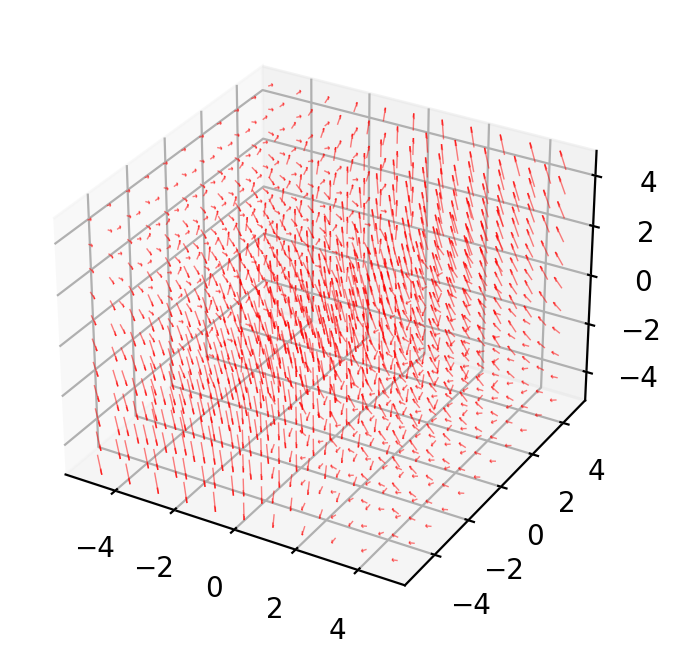

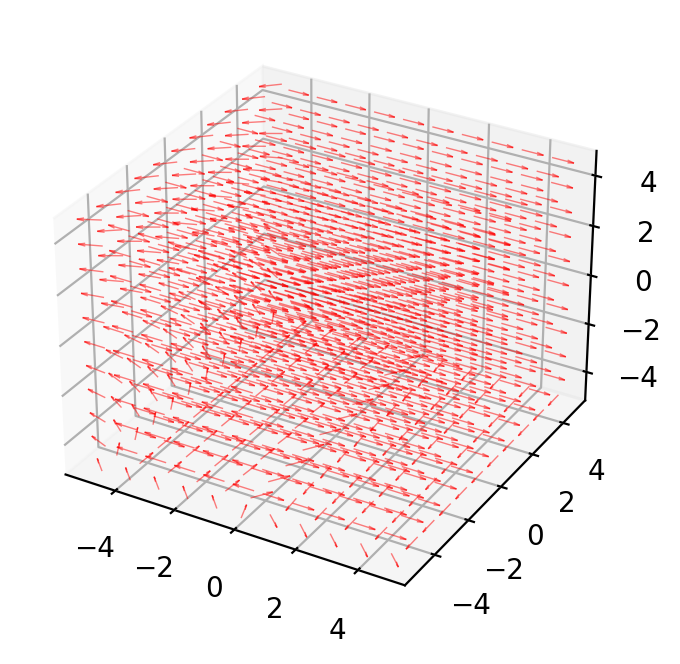

In [163]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot the curl.
ed.draw_vector_field(X,Y,Z,*dF)

stride = 1

It can be hard to make sense of the mass of arrows, but give it a try.  (You can reduce the number of arrows in a plot using the `stride` keyword ...)

What patterns or correlations do you notice between the arrows in the original vector field and those in its curl?

I added and messed around with stride, but it didn't seem to change the mess of arrows at all. But, the original vector field shows the vectors encircling a central area. the corresponding curl representation makes sense if it is showing that the vector field curls in a consistent direction.

Try changing the definition of the vector field.  Describe your efforts and observations with other functions.  What was special about the original function?

I tried the following:
Fx = X
Fy = -Y
Fz = Z**2
(No clear direction)

Fx = -X
Fy = X
Fz = Z**2
(all first field pointing mostly up)

Fx = -X
Fy = X
Fz = Z
(same as above)

from these changes, I think the original defition fo teh function was special becauese it seems to be the only definition that creates an actual curl in the original vector field. 

## Combinations

Just as we can take second derivatives in calculus, we can combine the vector derivative operations.  Play around with the following.  Change the function definitions, and try to deduce patterns or special cases that seem interesting.

### Divergence of a Gradient

The divergence of the gradient of a function is also called the **laplacian** of the function:
$$\mathbf{div}(\mathbf{grad}(f)) = \nabla \cdot \nabla f = \nabla^2 f$$

In [178]:
# Define a function in 3D.
f = np.exp(X**2 - Y**4 - Z**9)

# Compute the divergence of the gradient.
ddf = vc.div(vc.grad(f,ds),ds)

C:\Users\jaime\AppData\Local\Temp\ipykernel_25448\1293738342.py:2: RuntimeWarning: overflow encountered in exp
  f = np.exp(X**2 - Y**4 - Z**9)
C:\Users\jaime\OneDrive\Documents\Electricty and Magnetism HW\electrodynamics\week-02\VectorCalculus.py:30: RuntimeWarning: invalid value encountered in add
  df[0] += np.diff(f,axis=0,prepend=0) / ds
C:\Users\jaime\OneDrive\Documents\Electricty and Magnetism HW\electrodynamics\week-02\VectorCalculus.py:32: RuntimeWarning: overflow encountered in add
  df[1] += np.diff(f,axis=1,prepend=0) / ds
C:\Users\jaime\OneDrive\Documents\Electricty and Magnetism HW\electrodynamics\week-02\VectorCalculus.py:49: RuntimeWarning: overflow encountered in add
  dA += np.diff(A[1],axis=1,append=0) / ds
C:\Users\jaime\OneDrive\Documents\Electricty and Magnetism HW\electrodynamics\week-02\VectorCalculus.py:49: RuntimeWarning: invalid value encountered in add
  dA += np.diff(A[1],axis=1,append=0) / ds
C:\Users\jaime\OneDrive\Documents\Electricty and Magnetism HW\el

<AxesSubplot:>

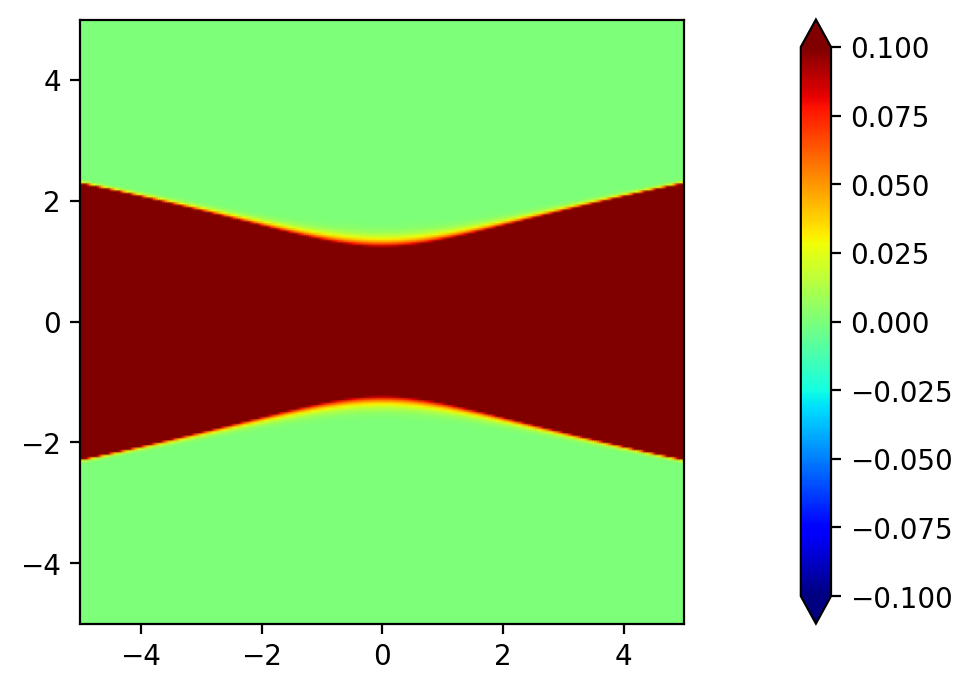

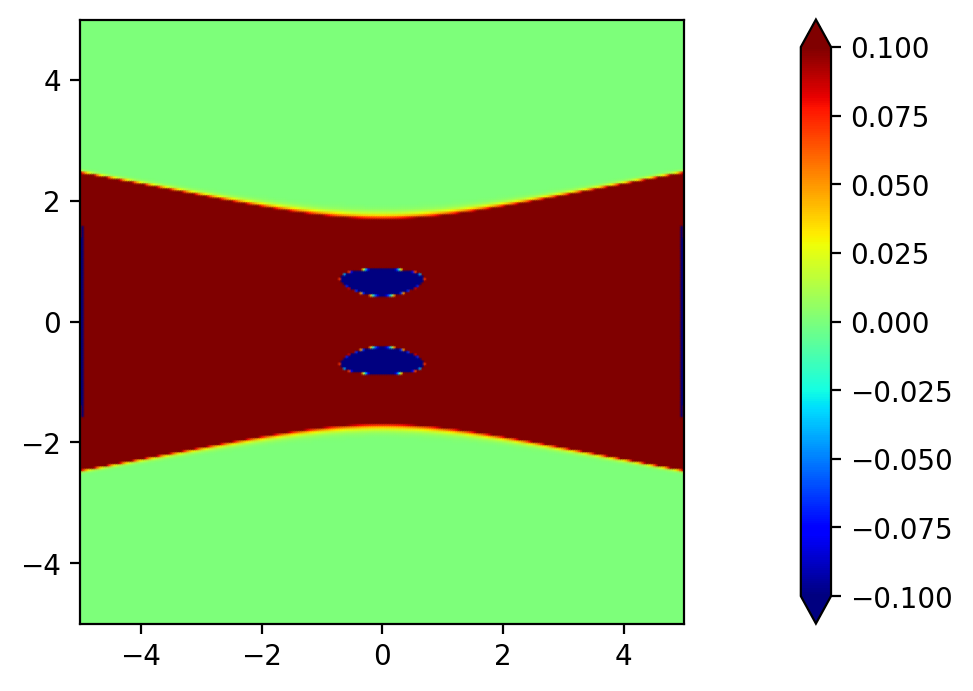

In [179]:
# Draw a slice of the function.
ed.draw_scalar_field(X,Y,Z,f, cutoff=f.max())

# Draw a slice of div-grad-f.
ed.draw_scalar_field(X,Y,Z,ddf, cutoff=ddf.max())

Just between f = np.exp(-X**2 - Y**4 - Z**8) and f = np.exp(-X**2 - Y**4 - Z**9) the div grad completely changes. multiplying Z by 9 gives a very bold slce, wheareas Z**8 causes divgrad to almost disappear.
Making X positive causes both slices to show the function to be increasing the most over an elongated area, rather than in on direction toward one point.

### Curl of a Gradient

The curl of the gradient is defined as
$$\mathbf{curl}(\mathbf{grad}(f)) = \nabla \times \nabla f$$

This operation has no special name.  Can you see why?

Is there no name because this combines all three, curl, grad, and div (delt operator)?

In [180]:
# Define a function in 3D.
f = np.exp(-X**2 - Y**2 - Z**2)

# Compute the curl of the gradient.
ddf = vc.curl(vc.grad(f,ds),ds)

<Axes3DSubplot:>

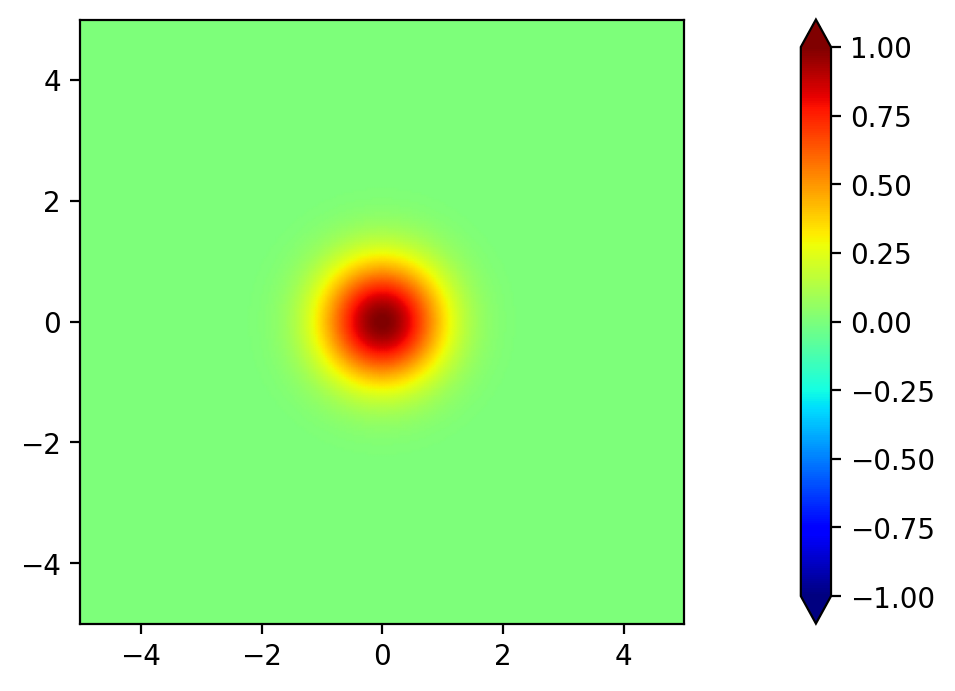

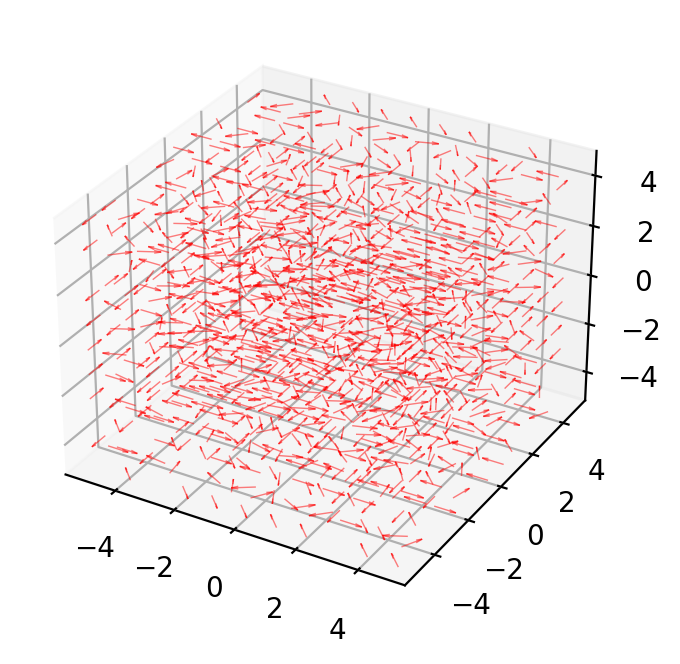

In [167]:
# Draw a slice of the function.
ed.draw_scalar_field(X,Y,Z,f, cutoff=f.max())

# Draw the vector field.
ed.draw_vector_field(X,Y,Z,*ddf)

<AxesSubplot:>

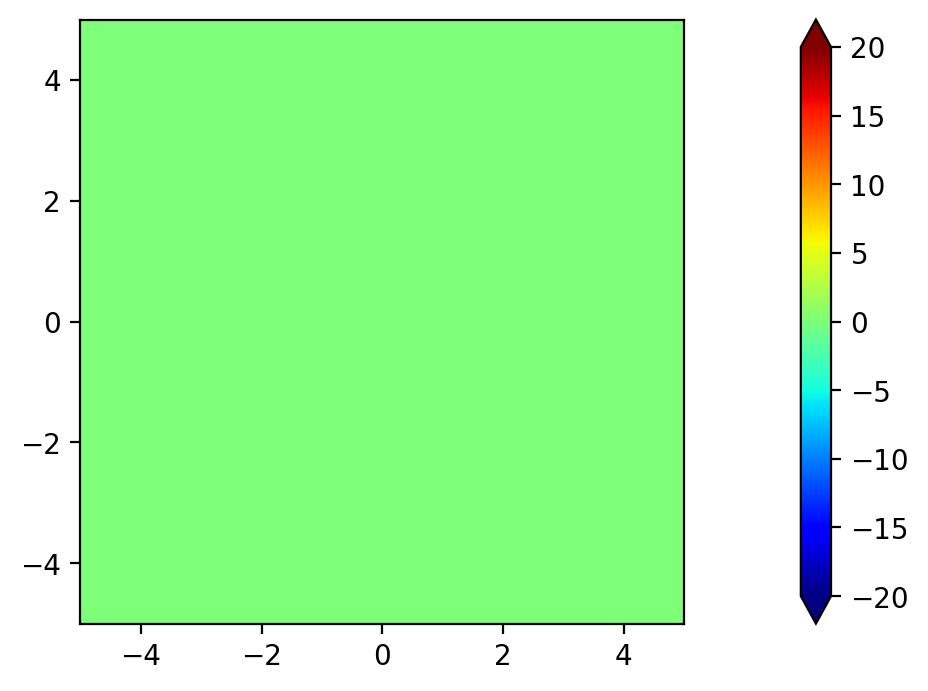

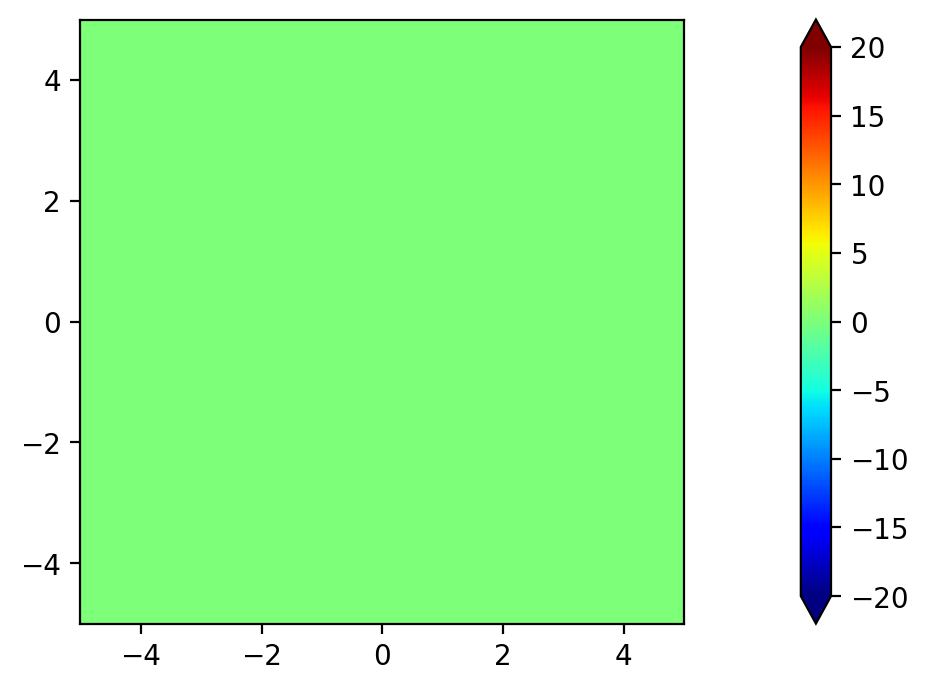

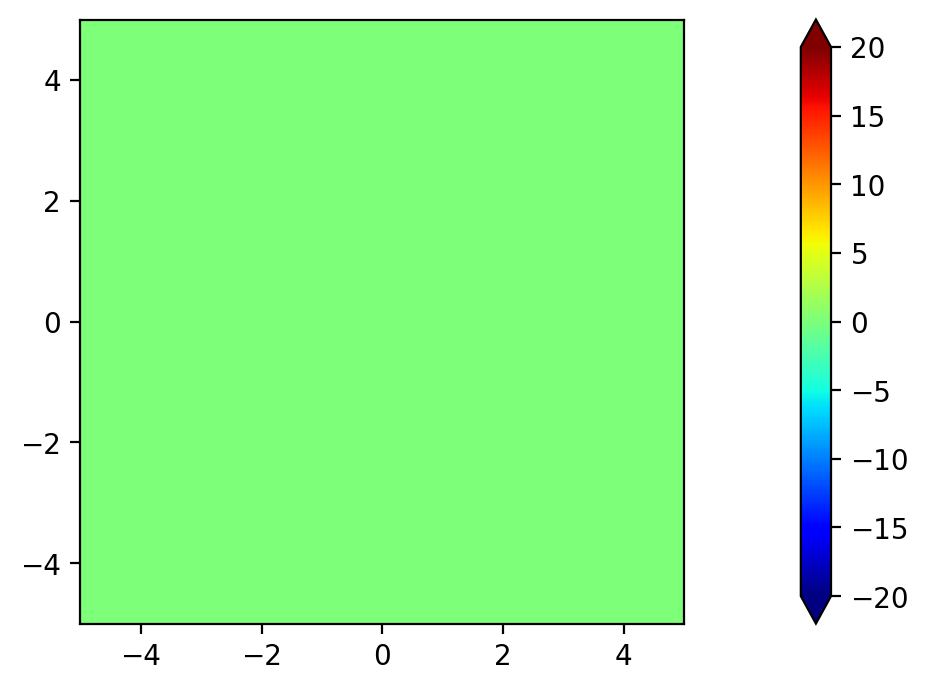

In [168]:
# Draw slices through the components of curl-grad-f.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,ddf[0], z0)  # x-component
ed.draw_scalar_field(X,Y,Z,ddf[1], z0)  # y-component
ed.draw_scalar_field(X,Y,Z,ddf[2], z0)  # z-component

### Curl of a Curl

The curl of the curl of a vector field is defined as
$$\mathbf{curl}(\mathbf{curl}(\vec{F})) = \nabla \times (\nabla \times \vec{F})$$

This operation will appear when we look at electromagnetic waves!

In [181]:
# Define a vector field.
Fx = Z*Y**2
Fy = Z*X**2
Fz = X*Y**2
F = np.stack([Fx, Fy, Fz])

# Compute the curl.
ddF = vc.curl(vc.curl(F,ds),ds)

<Axes3DSubplot:>

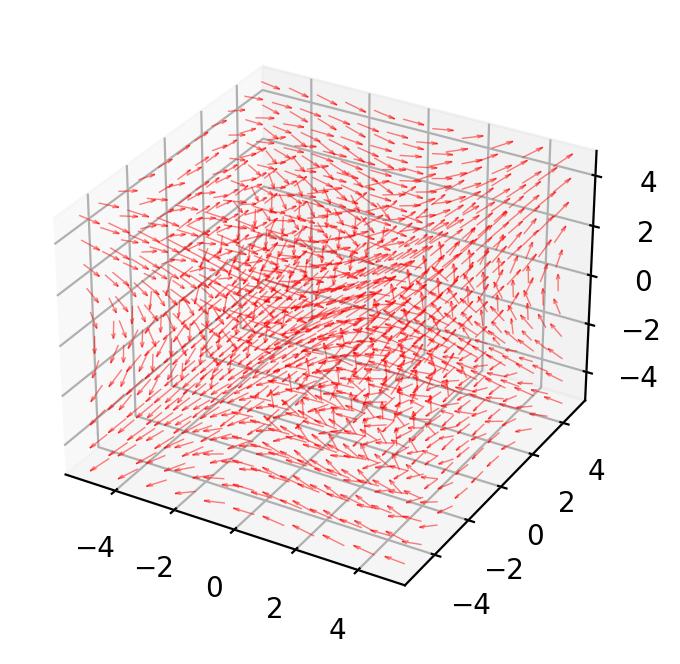

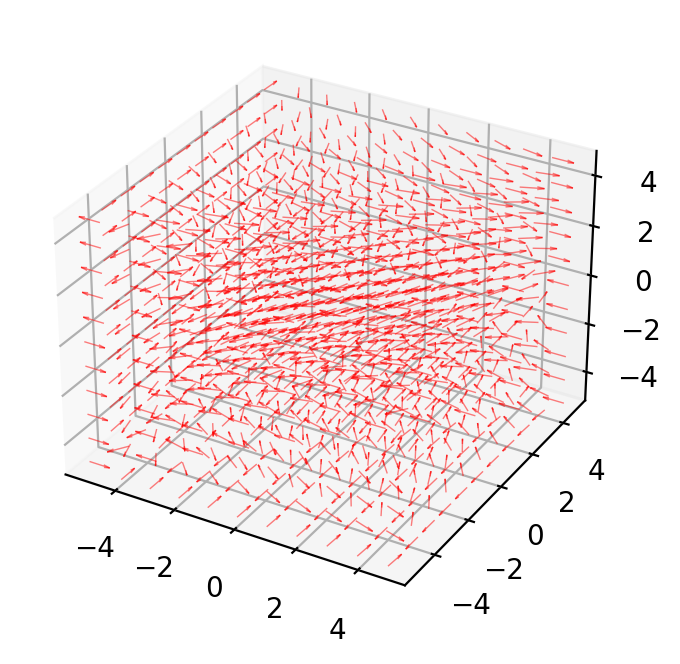

In [182]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot the curl-of-the-curl.
ed.draw_vector_field(X,Y,Z,*ddF)

<AxesSubplot:>

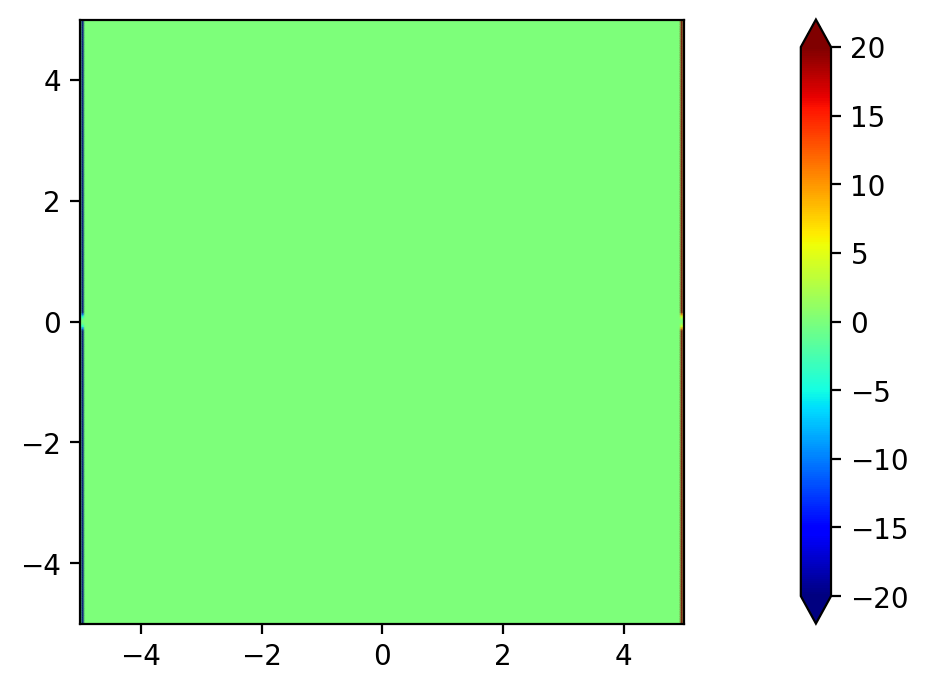

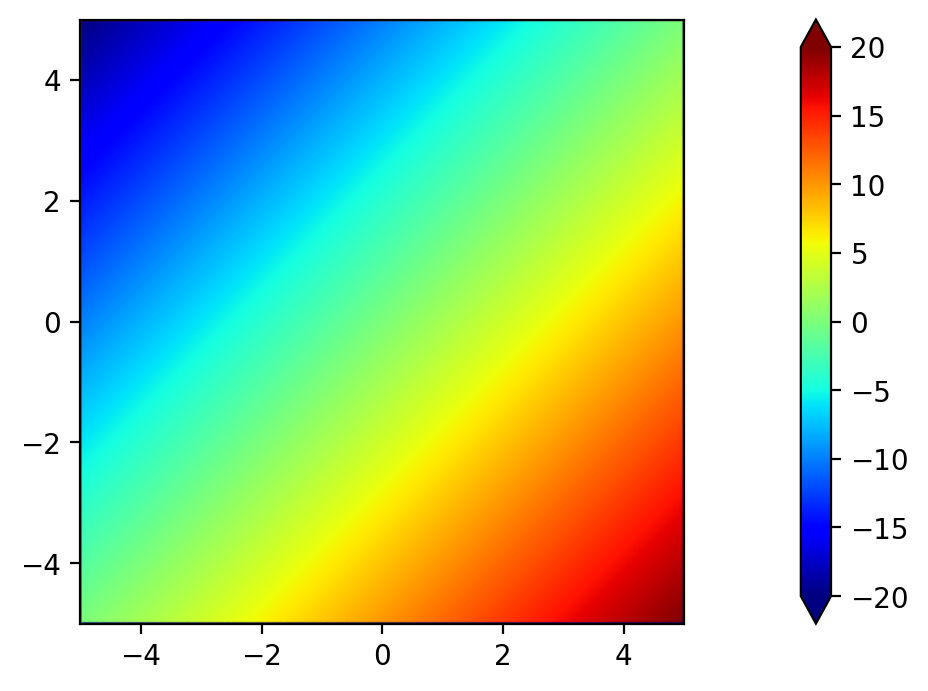

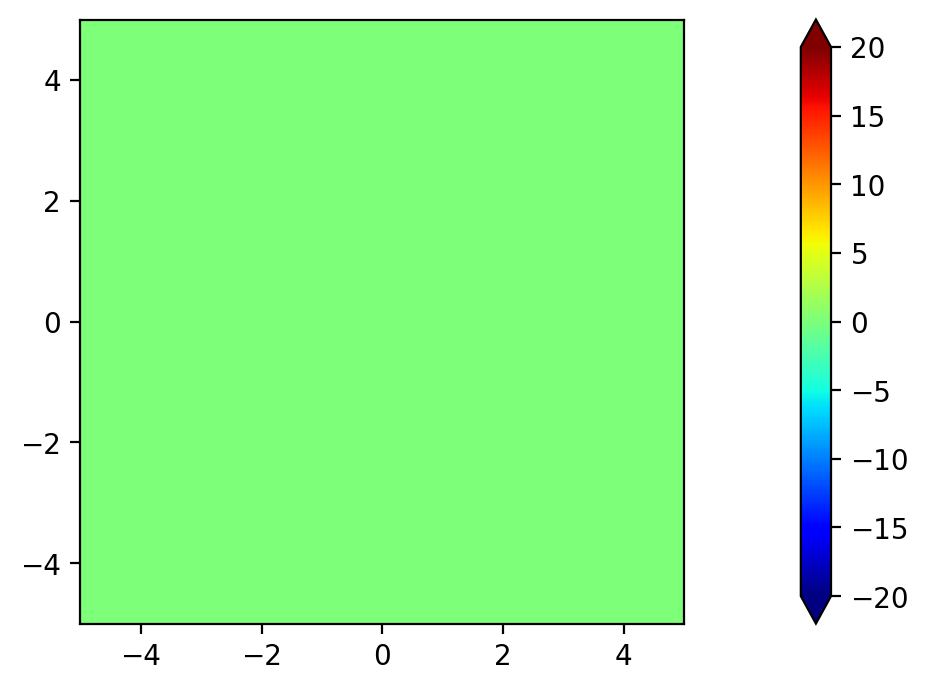

In [183]:
# Draw slices through the components of curl-curl-f.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,ddF[0], z0)  # x-component
ed.draw_scalar_field(X,Y,Z,ddF[1], z0)  # y-component
ed.draw_scalar_field(X,Y,Z,ddF[2], z0)  # z-component

### Divergence of a Curl

The divergence of the curl is written as
$$\mathbf{div}(\mathbf{curl}(\vec{F})) = \nabla \cdot (\nabla \times \vec{F})$$

This one has no special name either ...

In [184]:
# Define a vector field.
Fx = Z*Y**2
Fy = Z*X**2
Fz = X*Y**2
F = np.stack([Fx, Fy, Fz])

# Compute the curl.
ddF = vc.div(vc.curl(F,ds),ds)

<AxesSubplot:>

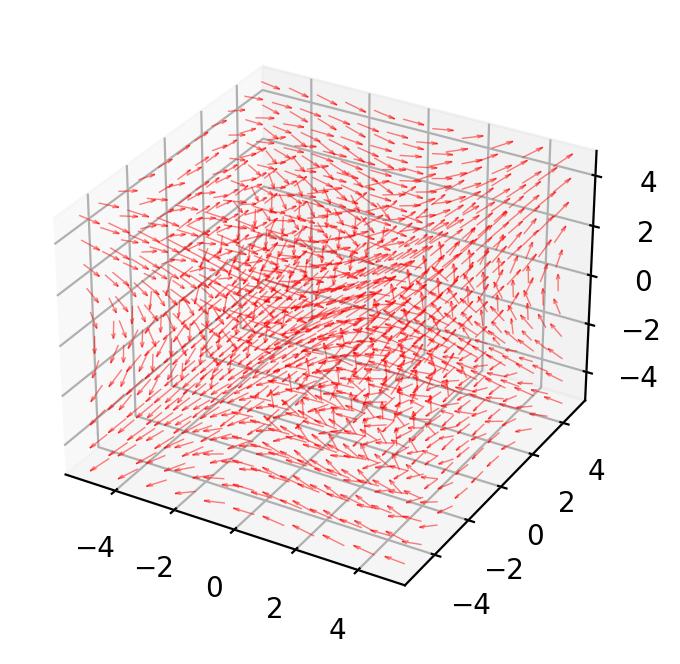

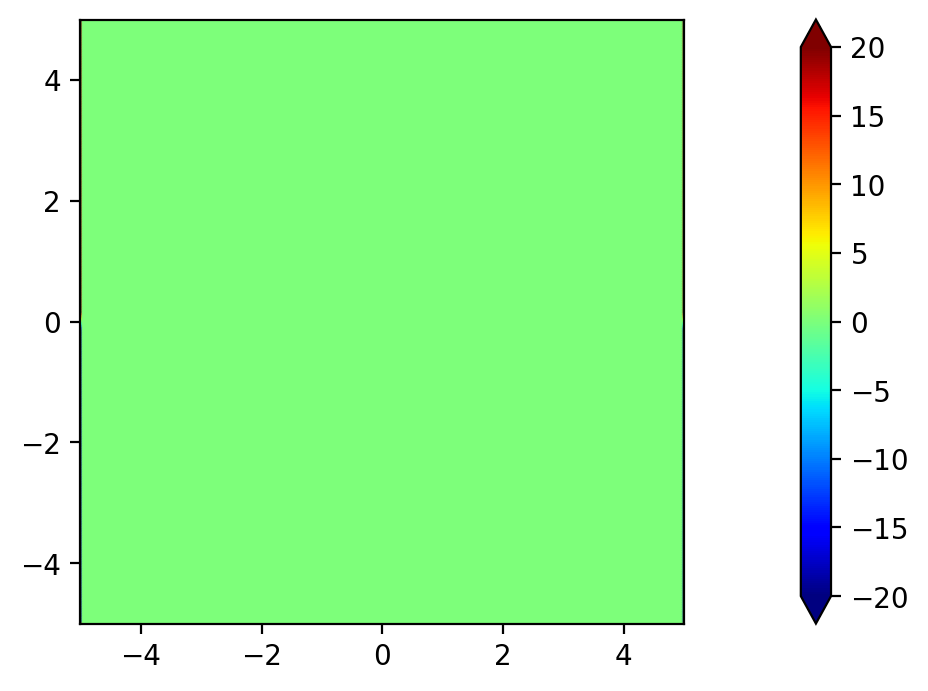

In [185]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot a slice of div-curl-F.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,ddF, z0)

## Reflection and Summary

Congratulations!  You just completed a crash course in vector calculus!

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

The major takeaway is that divergence and curl allow us to combine just two derivatives from a set of 9, which is pretty cool.
The most difficult part was that I still don't really understand vector calc, or the key ideas of grad, curl, and div. Also, I wish I could grab and swivel the plots to see them from more angles. I'm sure there's a fxn for this, but I didn't have time to look.
The most interesting part was how grad can represent a vector field, because I feel like the plots actually represent my understanding of grad.
I have a lot of questions. Mainly, what is divergence? No matter how I've heard it explained, it makes zero sense to me. Secondly, more simple stuff about vectors, like why does a set of vectors in three dimensions have 9 derivatives?